In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import quad

In [30]:
import numpy as np
from scipy.interpolate import CubicSpline

class ParametricCubicSpline:
    def __init__(self, t, points, bc_type='natural'):
        self.t = t
        self.points = points
         
        self.bc_type = bc_type
        self.spline_x = CubicSpline(t, points[:, 0], bc_type=bc_type)
        self.spline_y = CubicSpline(t, points[:, 1], bc_type=bc_type)
        
        self.coefficients_x = self.spline_x.c
        self.coefficients_y = self.spline_y.c

    def evaluate(self, t_val):
        x_val = self.spline_x(t_val)
        y_val = self.spline_y(t_val)
        return x_val, y_val

# Example usage:
t_values = np.linspace(0, 1, 4)  # Parameter values
control_points = np.array([[0, 0], [1, 3], [2, -1], [3, 2]])  # Control points

parametric_spline = ParametricCubicSpline(t_values, control_points)

In [31]:
# Target point
target_point = np.array([2, 1])
t_fine = np.linspace(0, 1, 1000)

coordinates = np.array([parametric_spline.evaluate(t_val) for t_val in t_fine])

for i, coef in enumerate(parametric_spline.coefficients_x):
    print(f"Coefficients for segment {i}: {coef}")

Coefficients for segment 0: [7.99360578e-15 0.00000000e+00 0.00000000e+00]
Coefficients for segment 1: [-2.66453526e-15 -2.66453526e-15  1.33226763e-15]
Coefficients for segment 2: [3. 3. 3.]
Coefficients for segment 3: [0. 1. 2.]


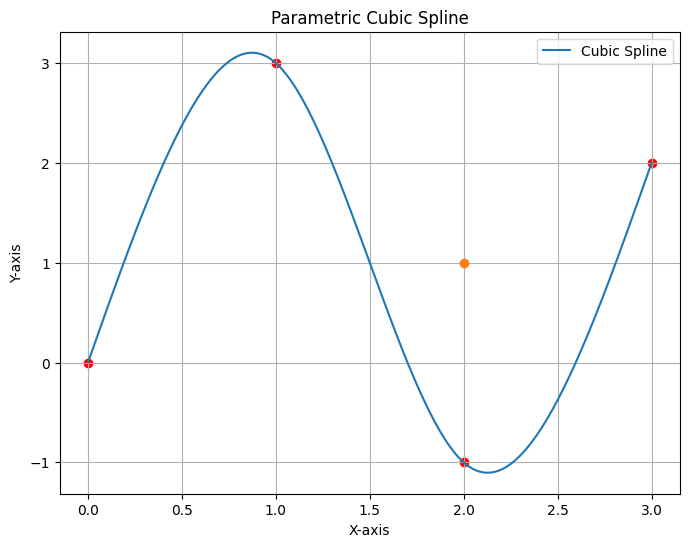

In [32]:
# Plot the original points and the cubic spline
plt.figure(figsize=(8, 6))
plt.plot(coordinates[:,0], coordinates[:,1], label='Cubic Spline')
plt.plot(target_point[0], target_point[1], 'o')
plt.scatter(control_points[:, 0], control_points[:, 1], marker='o', color='red')

plt.title('Parametric Cubic Spline')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from random import randint
from sympy import *
from sympy.abc import t

a1,a2,a3,a4,b1,b2,b3,b4,x,y = symbols('a1 a2 a3 a4 b1 b2 b3 b4 x y')

In [34]:
fx = a1*t**3+a2*t**2+a3*t+a4
fy = b1*t**3+b2*t**2+b3*t+b4
D = (fx-x)**2 + (fy-y)**2

D
D_1 = diff(D,t)
D_2 = diff(D_1,t)

In [35]:
simplify(D)

(a1*t**3 + a2*t**2 + a3*t + a4 - x)**2 + (b1*t**3 + b2*t**2 + b3*t + b4 - y)**2

In [36]:
simplify(D_1)

2*(3*a1*t**2 + 2*a2*t + a3)*(a1*t**3 + a2*t**2 + a3*t + a4 - x) + 2*(3*b1*t**2 + 2*b2*t + b3)*(b1*t**3 + b2*t**2 + b3*t + b4 - y)

In [37]:
simplify(D_2)

4*(3*a1*t + a2)*(a1*t**3 + a2*t**2 + a3*t + a4 - x) + 4*(3*b1*t + b2)*(b1*t**3 + b2*t**2 + b3*t + b4 - y) + 2*(3*a1*t**2 + 2*a2*t + a3)**2 + 2*(3*b1*t**2 + 2*b2*t + b3)**2